# Julia バージョン確認

In [1]:
versioninfo()

Julia Version 0.7.0
Commit a4cb80f3ed (2018-08-08 06:46 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) M-5Y51 CPU @ 1.10GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, broadwell)


# gif を作成後 base64 に変換する 方法
- http://nbviewer.jupyter.org/gist/genkuroki/b46b0a094ee232302d41780defaffd6e

In [2]:
import PyPlot
plt = PyPlot

using PyCall
animation = pyimport("matplotlib.animation")

using Base64 # for Julia >= 0.7.0
function displayfile(mimetype, filename)
    open(filename) do f
        base64text = base64encode(f)
        display("text/html", """<img src="data:$mimetype;base64,$base64text">""")
    end
end

displayfile (generic function with 1 method)


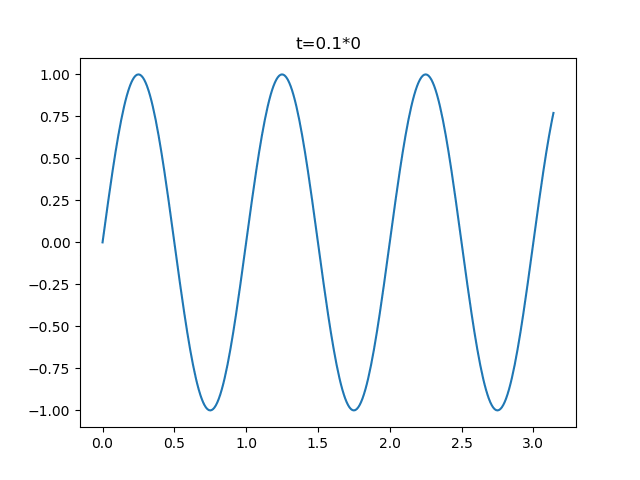

┌ Warning: The start/next/done iteration protocol is deprecated. Implement `iterate(::PyDict{Symbol,PyObject,true})`.
│   caller = ip:0x0
└ @ Core :-1


In [3]:
fig, ax = plt.subplots()
times = 50
xs=[i for i in range(0, step=0.01, stop=π)]
function update(counter)
    ax[:clear]()
    ax[:plot](xs, sin.(2π*(xs .+ 0.1*counter)))
    ax[:set_title]("t=0.1*$counter")
end

ani = animation[:FuncAnimation](fig,update,frames=times,interval=500)
ani[:save]("output.gif", writer="imagemagick")
plt.close(ani[:_fig])
displayfile("image/gif", "output.gif")

# `from IPython.display import HTML` を用いる方法

[Jupyterでmatplotlibのjavascriptアニメーションを動かす](https://qiita.com/yoku_001/items/11ac4ad1df349095655c)

```python
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0, 6*np.pi, num=60)
x = 2.0 * np.cos(t) + 5.0 * np.cos(2.0/3.0 * t)
y = 2.0 * np.sin(t) - 5.0 * np.sin(2.0/3.0 * t)

fig, ax = plt.subplots(figsize=(5, 5))
l, = ax.plot([-7, 7],[-7, 7])

animate = lambda i: l.set_data(x[:i], y[:i])
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval = 1000/30.0)

from IPython.display import HTML
HTML(ani.to_jshtml())
```

## 上のコードのJulia版

In [4]:
import PyPlot
plt = PyPlot

using PyCall
animation = pyimport("matplotlib.animation");

In [5]:
ts = range(0, stop=6π,length=60)
xs = 2cos.(ts) + 5cos.(2.0/3.0 * ts)
ys = 2sin.(ts) - 5sin.(2.0/3.0 * ts);

fig, ax = plt.subplots(figsize=(5,5))
line = ax[:plot]([],[])[1]
function update(t)
    ax[:clear]()
    ax[:plot](xs[1:t], ys[1:t])
    ax[:set_xlim]([-7,7])
    ax[:set_ylim]([-7,7])
    ax[:set_title]("t=$t")
end

ani = animation[:FuncAnimation](fig,update,frames=length(ts) ,interval=50)
plt.close(ani[:_fig])

In [6]:
# https://github.com/JuliaLang/IJulia.jl/issues/281
@pyimport IPython.display as d
d.HTML(ani[:to_jshtml]())

PyObject <IPython.core.display.HTML object>